In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [24]:
#sm.stats.anova_lm()

In [25]:
data = pd.read_csv("Hw1_2table.csv")

In [26]:
data.head()

,X,Y
0,6,526
1,3,421
2,6,581
3,9,630
4,3,412


In [27]:
## simple linear regression

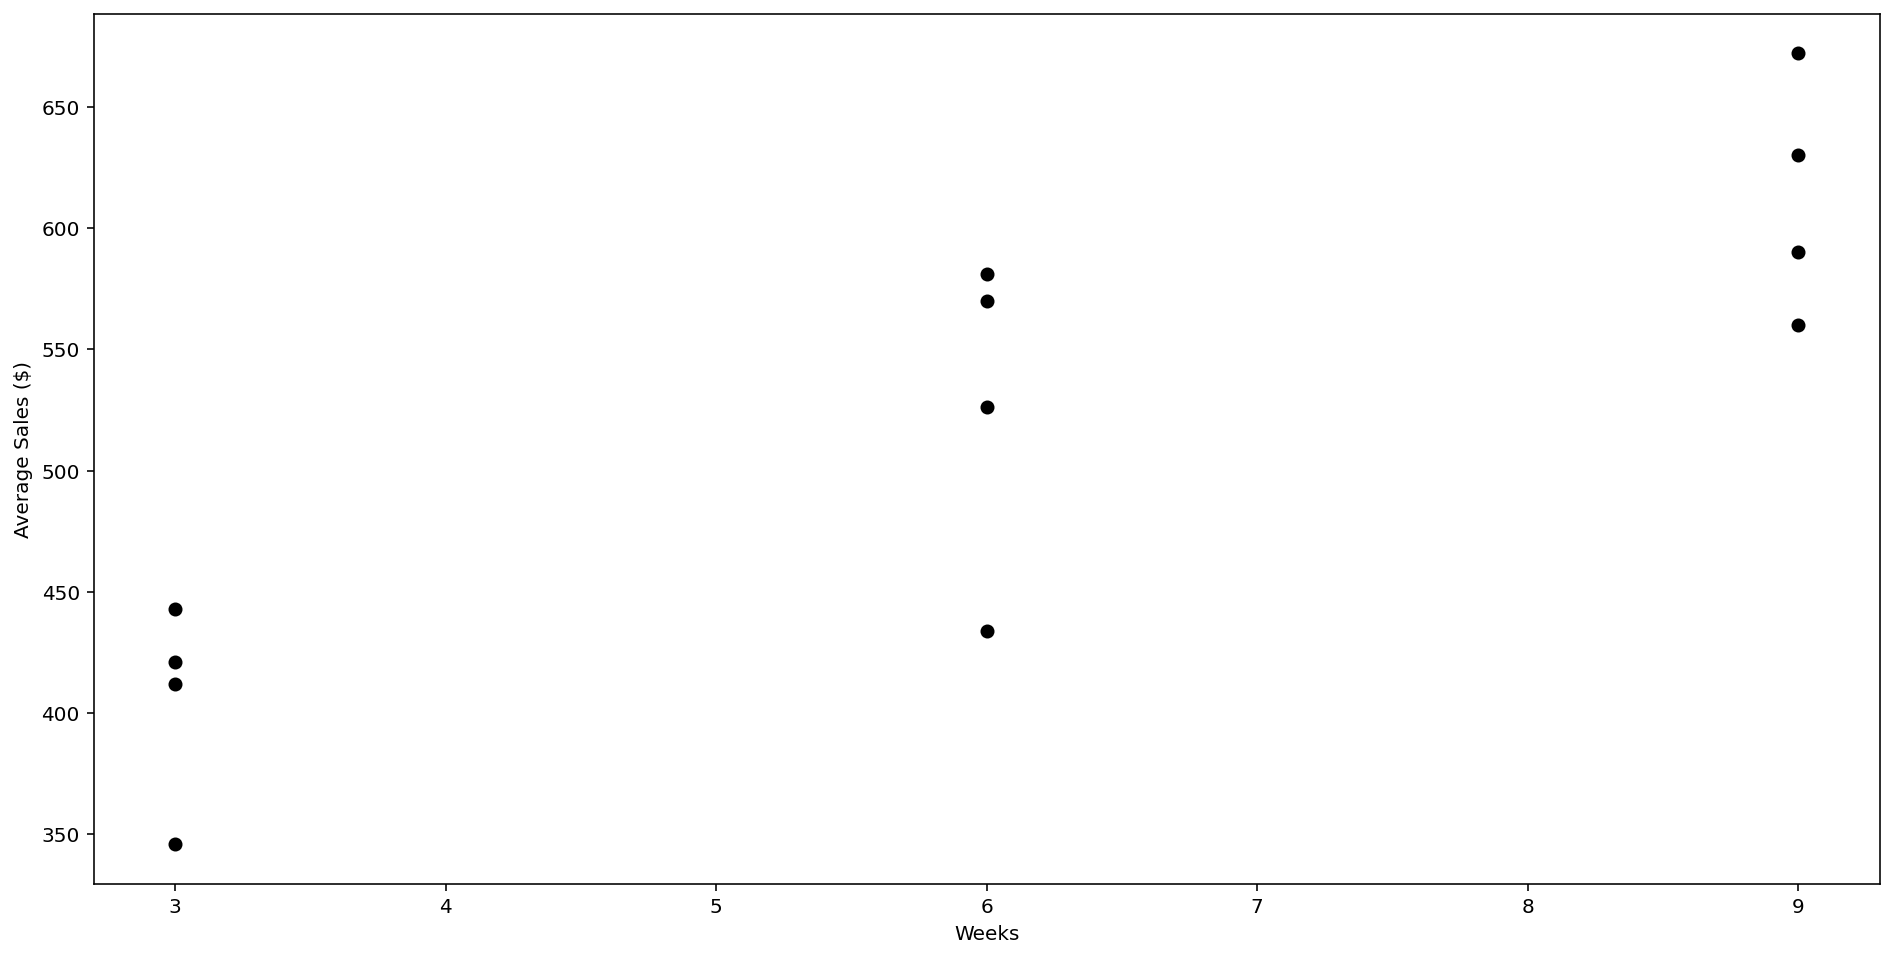

In [28]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['X'],
    data['Y'],
    c='black'
)
plt.xlabel("Weeks")
plt.ylabel("Average Sales ($)")
plt.show()

In [29]:
X = data['X'].values.reshape(-1,1)
y = data['Y'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [30]:
# Regression coefficients
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

34.583333333333336
307.91666666666663
The linear model is: Y = 307.92 + 34.583X


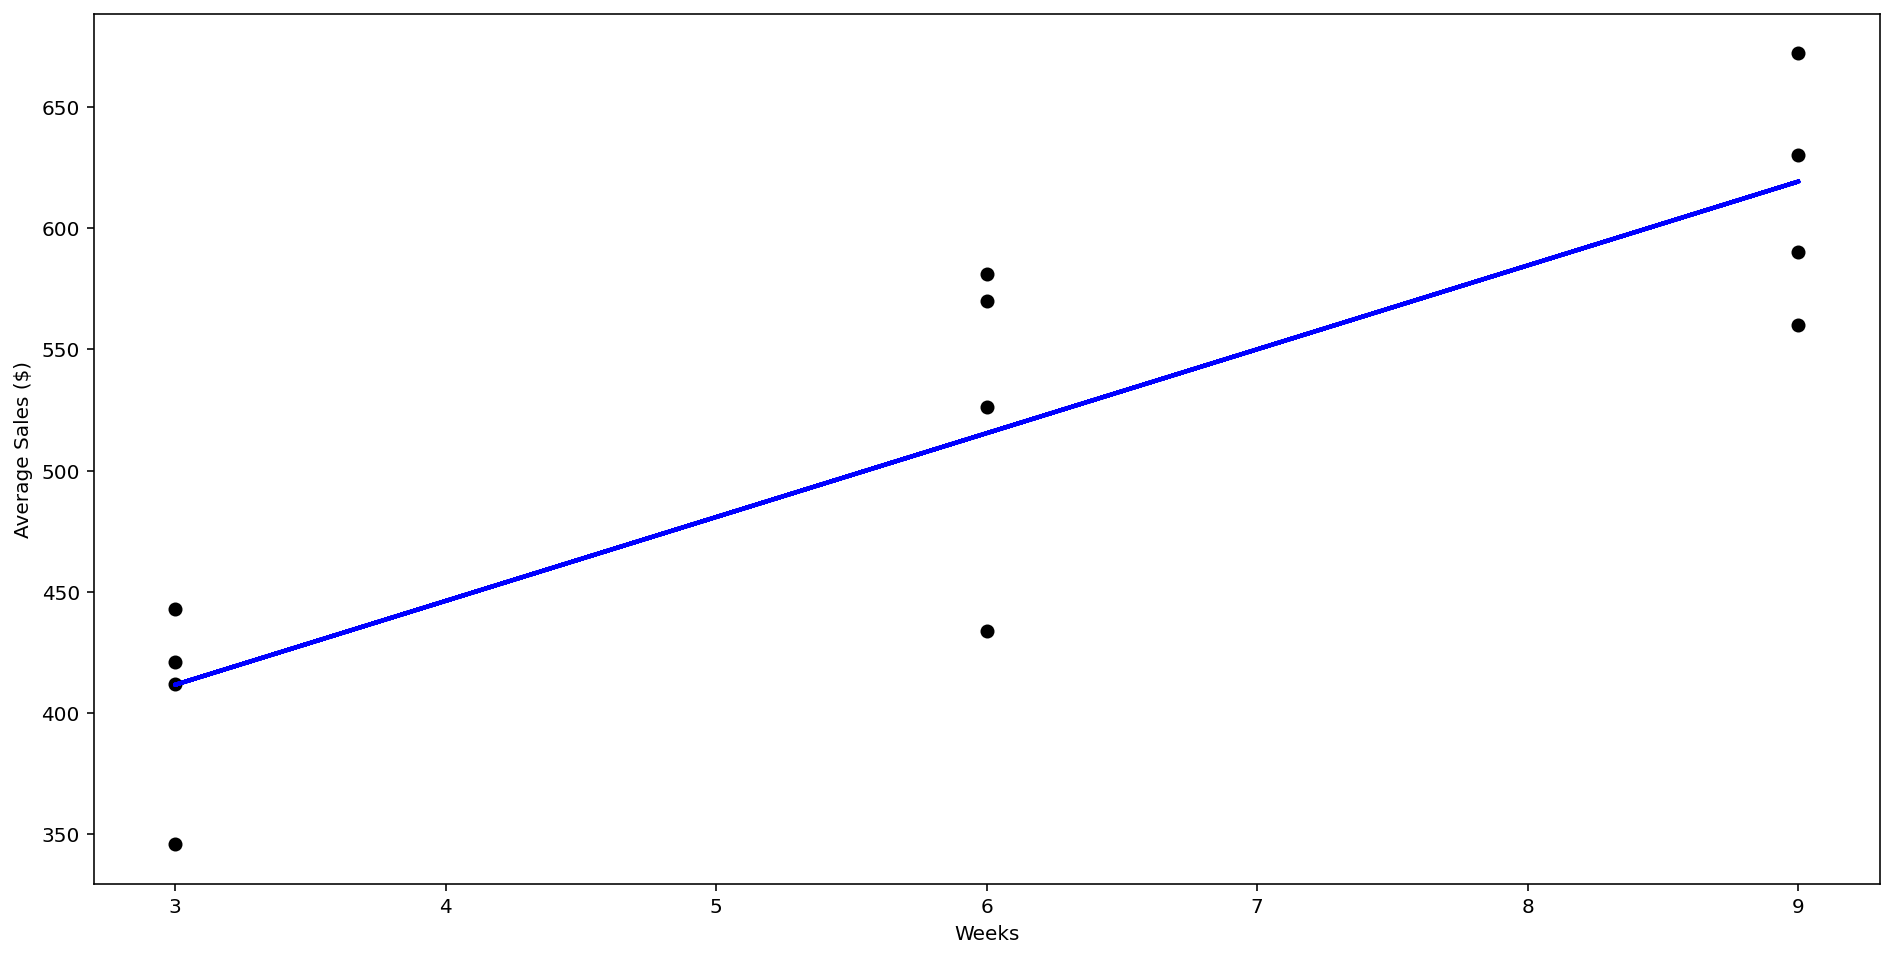

In [31]:
predictions = reg.predict(X)

plt.figure(figsize=(16, 8))
plt.scatter(
    data['X'],
    data['Y'],
    c='black'
)
plt.plot(
    data['X'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Weeks")
plt.ylabel("Average Sales ($)")
plt.show()

In [32]:
# Covariance
print(np.cov(data)[0][1])

108680.0


In [33]:
# Correlation
print(np.corrcoef(data)[0][1])

1.0


In [11]:
# Evaluation metrics
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     32.30
Date:                Sat, 09 Oct 2021   Prob (F-statistic):           0.000203
Time:                        17:59:20   Log-Likelihood:                -63.264
No. Observations:                  12   AIC:                             130.5
Df Residuals:                      10   BIC:                             131.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        307.9167     39.437      7.808      0.0

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [14]:
# RSE
np.sqrt(est2.scale)

51.63566274065501